In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv("dataset/Liver/indian_liver_patient.csv")
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [3]:
df["disease"]=df.Dataset
df.drop(["Dataset"],axis=1,inplace=True)

In [4]:
df["disease"]=df["disease"].apply(lambda x: 0 if x==2 else 1)

In [5]:
df.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,disease
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,0


In [6]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [5]:
df["Gender"]=df["Gender"].map({"Female":0,"Male":1})

In [6]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
disease                       0
dtype: int64

C:\Users\Armaan\AppData\Local\Temp\ipykernel_24568\3158709283.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Albumin_and_Globulin_Ratio"])


<Axes: xlabel='Albumin_and_Globulin_Ratio', ylabel='Density'>

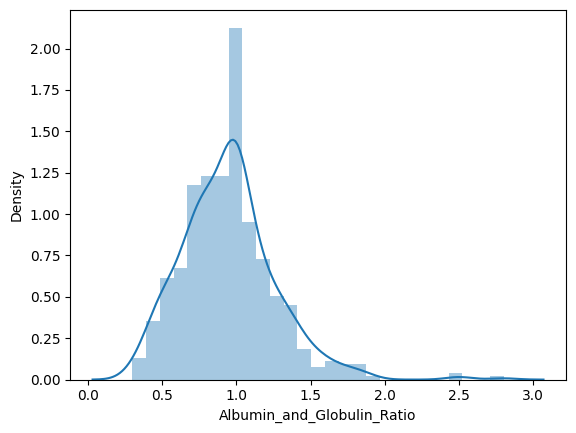

In [9]:
sns.distplot(df["Albumin_and_Globulin_Ratio"])

In [7]:
df["Albumin_and_Globulin_Ratio"].fillna(1,inplace=True)

In [11]:
df.head(1)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.9,1


In [ ]:
k=df.columns
i=0
sns.distplot(df[k[i]])

In [ ]:
sns.boxplot(df[k[i]])

In [ ]:
p25=df[k[i]].quantile(0.25)
p75=df[k[i]].quantile(0.75)
iqr=p75-p25
uprlmt=p75+1.5*iqr
lwrlmt=p25-1.5*iqr
uprlmt,lwrlmt

In [ ]:
df[df[k[i]]>uprlmt]

In [ ]:
df[df[k[i]]<lwrlmt]

In [ ]:
df[k[i]]=np.where(df[k[i]]>uprlmt,uprlmt,np.where(df[k[i]]<lwrlmt,lwrlmt,df[k[i]]))

In [12]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,disease
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  disease                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


In [14]:
df.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,disease
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947427,0.713551
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318522,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [8]:
df["Age"]=df["Age"]/100
df["Total_Bilirubin"]=df["Total_Bilirubin"]/6
df["Direct_Bilirubin"]=df["Direct_Bilirubin"]/3
df["Alkaline_Phosphotase"]=df["Alkaline_Phosphotase"].apply(lambda x:(x-63)/(482-63))
df["Alamine_Aminotransferase"]=df["Alamine_Aminotransferase"].apply(lambda x:(x-10)/(120-10))
df["Aspartate_Aminotransferase"]=df["Aspartate_Aminotransferase"].apply(lambda x:(x-10)/(180-10))
df["Total_Protiens"]=df["Total_Protiens"]/10
df["Albumin"]=df["Albumin"]/6
df["Albumin_and_Globulin_Ratio"]=df["Albumin_and_Globulin_Ratio"]/2

In [9]:
df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,disease
0,0.65,0,0.116667,0.033333,0.295943,0.054545,0.047059,0.68,0.550000,0.450,1
1,0.62,1,1.816667,1.833333,1.517900,0.490909,0.529412,0.75,0.533333,0.370,1
2,0.62,1,1.216667,1.366667,1.019093,0.454545,0.341176,0.70,0.550000,0.445,1
3,0.58,1,0.166667,0.133333,0.284010,0.036364,0.058824,0.68,0.566667,0.500,1
4,0.72,1,0.650000,0.666667,0.315036,0.154545,0.288235,0.73,0.400000,0.200,1
...,...,...,...,...,...,...,...,...,...,...,...
578,0.60,1,0.083333,0.033333,1.042959,0.090909,0.141176,0.59,0.266667,0.185,0
579,0.40,1,0.100000,0.033333,0.083532,0.227273,0.123529,0.60,0.533333,0.550,1
580,0.52,1,0.133333,0.066667,0.434368,0.345455,0.229412,0.64,0.533333,0.500,1
581,0.31,1,0.216667,0.166667,0.288783,0.172727,0.129412,0.68,0.566667,0.500,1


In [ ]:
corr=df.corr()
plt.figure(figsize=(20,10)) 
sns.heatmap(corr,cmap="Blues",annot=True)

In [10]:
x=df.drop(["disease"],axis=1)
y=df["disease"]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,shuffle=True)

In [12]:
y_test.value_counts()

disease
1    100
0     46
Name: count, dtype: int64

In [13]:
import tensorflow as tf

In [16]:
model=tf.keras.Sequential([
    # tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Input(shape=[10],dtype=tf.float32),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(48,activation="relu"),
    tf.keras.layers.Dense(32,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),loss=tf.losses.binary_crossentropy,metrics=["accuracy"])

In [38]:
model.fit(x,y,epochs=10,shuffle=True)

Epoch 1/10
19/19 [==============================] - 0s 2ms/step - loss: 0.1033 - accuracy: 0.9571
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.9588
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9743
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 0.1001 - accuracy: 0.9657
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 0.1012 - accuracy: 0.9588
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 0.1075 - accuracy: 0.9537
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9623
Epoch 8/10
19/19 [==============================] - 0s 2ms/step - loss: 0.1174 - accuracy: 0.9503
Epoch 9/10
19/19 [==============================] - 0s 2ms/step - loss: 0.0959 - accuracy: 0.9605
Epoch 10/10
19/19 [==============================] - 0s 2ms/step - loss: 0.0967 - accuracy: 0.9674


In [42]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.0946 - accuracy: 0.9658


[0.09461252391338348, 0.965753436088562]

In [40]:
y_pred=model.predict(x_test)
y_pred=y_pred.round().ravel()
confusion_matrix(y_test,y_pred)

5/5 [==============================] - 4s 1ms/step


array([[ 41,   5],
       [  0, 100]], dtype=int64)

In [41]:
model.save("liverModel.h5") #0.986